In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from random import sample
import matplotlib.pyplot as plt
#from sklearn import preprocessing
import scipy.stats as sc
from scipy.stats import norm

## DATA READING, ANALYISING AND CLEANING

In [2]:
#READING THE DATA INTO A PANDAS DATAFRAME
data = pd.read_csv('netflix_titles.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 341.0+ KB


In [4]:
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [6]:
data.shape

(6234, 12)

In [7]:
#Handling case Inconsistency in Country Column
data['country'] = data['country'].str.upper()
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","UNITED STATES, INDIA, SOUTH KOREA, CHINA","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,UNITED KINGDOM,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",UNITED STATES,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",UNITED STATES,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",UNITED STATES,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
#Handling Inconsistent values in country column

wrong_data=["usa","united States"]

for i in range(len(wrong_data)):
    data.replace({'country':{wrong_data[i]: 'UNITED STATES'}},inplace=True)

In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
#Dropping the column 'date_added' because it is irrelevant
data.drop(axis = 1, labels = ['date_added'], inplace = True)

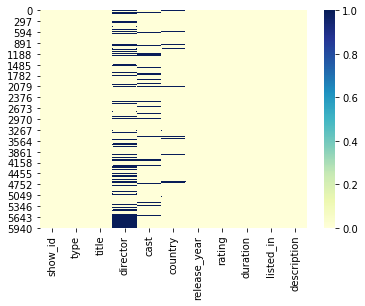

In [11]:
# plt.figure(figsize = (15, 9))
sns.heatmap(data.isna(), cmap="YlGnBu")

In [12]:
data['director'].fillna('-', inplace = True)
data['cast'].fillna('-', inplace= True)

#Dropping the observations with no rating will not affect the dataset much
data.dropna(subset = ['rating'], inplace = True)

## DATA VISUALIZATION

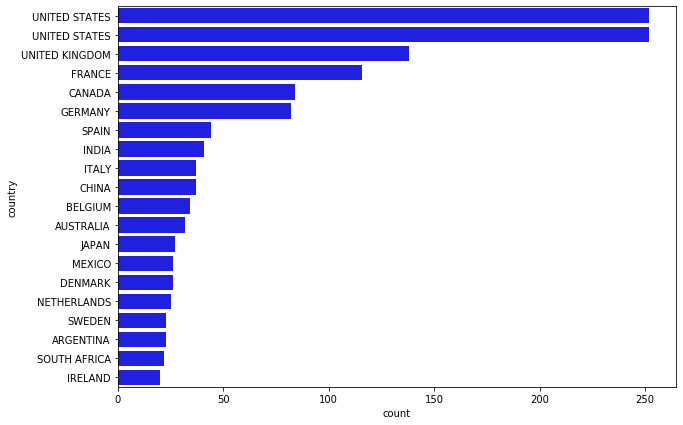

In [13]:
#Handling missing country values before visualizing data
data['country'].fillna(' ', inplace = True)

country_list = list(set(data['country'].tolist()))
unique_country = list(set(', '.join(country_list).split(',')))
unique_country = list(map(lambda x : x.strip(), unique_country))
unique_country = sorted(list(filter(lambda x : x != '', unique_country)))
unique_country.remove('ICELAND')

country_list = ', '.join(country_list).split(',')
country_list = list(map(lambda x : x.strip(), country_list))

country_counts = []

for i in unique_country:
    country_counts.append(country_list.count(i))
    
    
plt.figure(figsize = (10, 7))
dfc = pd.DataFrame({'country' : unique_country, 'count' : country_counts})

#To plot top 20 countries with most netflix content in the world

sns.barplot(x='count', y="country", data=dfc, order=dfc.sort_values('count', ascending = False).iloc[0:20].country, color = 'blue')

plt.show()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


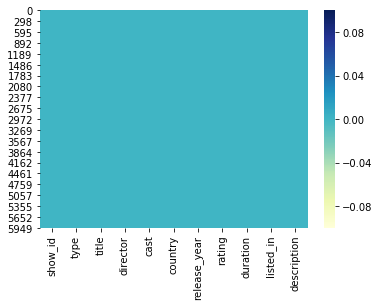

In [14]:
print(data.isna().sum())
sns.heatmap(data.isna(), cmap="YlGnBu")

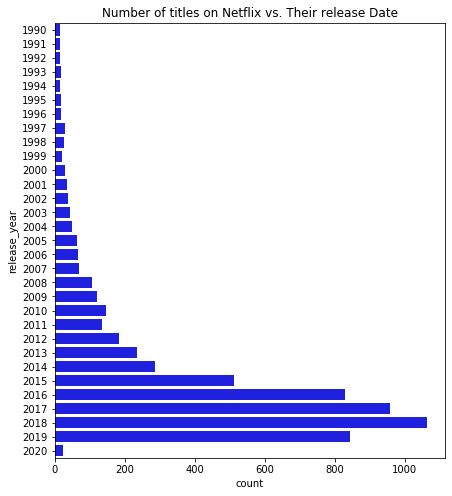

In [15]:
#Number of titles on Netflix vs. Their release Date

plt.figure(figsize=(7, 8))
plt.title('Number of titles on Netflix vs. Their release Date')
d = data[data['release_year'] >= 1990]
sns.countplot(y = d['release_year'], color = 'blue')
plt.show()

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  # Remove the CWD from sys.path while we load stuff.


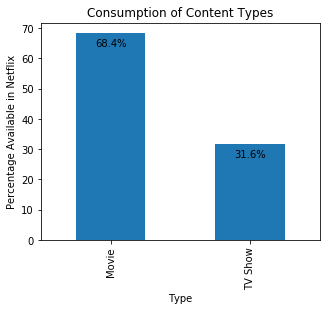

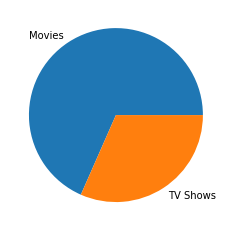

In [16]:
group_netflix=pd.DataFrame(data.type.value_counts())
total_types = group_netflix['type'].sum()
group_netflix['percentage'] = (group_netflix['type']/total_types) * 100

x = [group_netflix.index[i] for i in range(2)]
y = [group_netflix['percentage'][i] for i in range(2)]

plt.figure(figsize=(5, 4))

freq_series = pd.Series.from_array(y)
ax = freq_series.plot(kind='bar')
ax.set_title('Consumption of Content Types')
ax.set_xlabel('Type')
ax.set_ylabel('Percentage Available in Netflix')
ax.set_xticklabels(x)

rects = ax.patches

# Make some labels.
labels = ["{p}%".format(p = i) for i in [round(i, 2) for i in y]]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height - 5 , label,
            ha='center', va='bottom')
    
plt.show()    
plt.pie(data['type'].value_counts().tolist(), labels = ['Movies', 'TV Shows'])
plt.show()

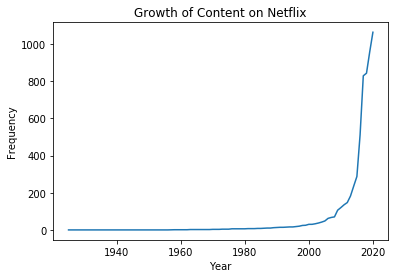

In [17]:
#Content added over the years

years = sorted(list(set(data['release_year'].tolist())), reverse = True)

content_count = (data['release_year'].value_counts()).tolist()

plt.title('Growth of Content on Netflix')
plt.xlabel('Year')
plt.ylabel('Frequency')

sns.lineplot(x = years, y = content_count)
plt.show()

In [18]:
#Splitting the whole dataset into movie and tv datasets for better conclusions
data_movies = data[data['type'] == 'Movie']
data_tv = data[data['type'] == 'TV Show']

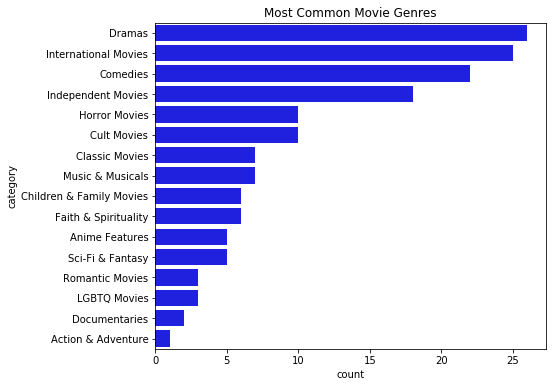

In [19]:
categories = []
for i in range(len(data_movies['show_id'])):
    try:
        categories.append(data_movies['listed_in'][i]);
    except:
        continue;
cats =list(set(categories))
unique_cats = list(set(', '.join(cats).split(', ')))
ref_cats = ''.join(cats).split(', ')
counts = []
for i in unique_cats:
    counts.append(ref_cats.count(i))
    
plt.figure(figsize = (7, 6))
# plt.barh(unique_cats, counts)
dfmc = pd.DataFrame({'category' : unique_cats, 'count' : counts})

plt.title('Most Common Movie Genres')


sns.barplot(x='count', y="category", data=dfmc, order=dfmc.sort_values('count', ascending = False).iloc[0:16].category, color = 'blue')

plt.show()

## NORMALIZATION OF DURATION CURVE OF NETFLIX MOVIES

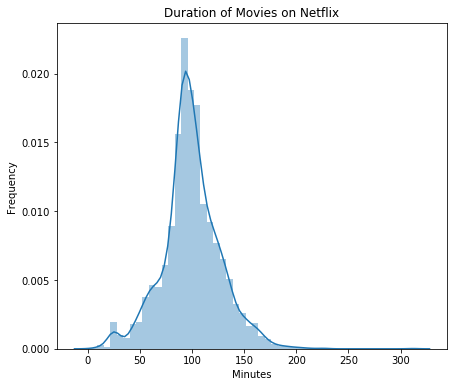

In [20]:
durations = list(map(lambda x : int(x.split(' ')[0]),data_movies['duration'].tolist()))
plt.figure(figsize = (7,6))
sns.distplot(durations, norm_hist= True)
plt.title('Duration of Movies on Netflix')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

In [21]:
#Finding outliers in durations values

# sns.boxplot(durations)

In [22]:
# x = pd.Series(durations) # 200 values
# x = x[x.between(x.quantile(.25), x.quantile(.75))] # without outliers
# sns.boxplot(x)

In [23]:
# s = pd.Series(durations)
# ax = s.plot.kde()

In [24]:
sss = np.array(durations)
mean_duration = np.mean(sss)
std_duration = np.std(sss)

print('Mean:',mean_duration, '\nStandard Deviation:', std_duration, '\nvariance:', std_duration**2, '\nMedian:', np.median(sss) )

z = []

for i in sss:
    z.append((i - mean_duration)/std_duration)
    

Mean: 99.15644820295984 
Standard Deviation: 28.05332268503777 
variance: 786.9889136708548 
Median: 98.0


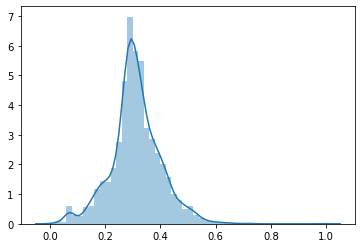

In [25]:
#Plotting Normalized Curve for durations of movies 

den = max(sss) - min(sss)
minimun_dur = min(sss)
normalized = [((i - minimun_dur ) / den) for i in sss]
sns.distplot(normalized)

plt.show()


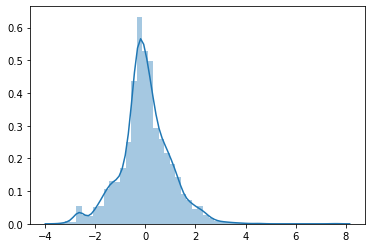

In [26]:
#Plotting standardized Normal Distribution for the durations of movies
from sklearn import preprocessing
standardized_d = preprocessing.scale(durations)

sns.distplot(standardized_d)

plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
scaled_features=data.copy()
scaled_features["duration"] = list(map(lambda x : int(x.split(' ')[0]),data['duration'].tolist()))
col_names=['show_id','release_year','duration']
features= scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

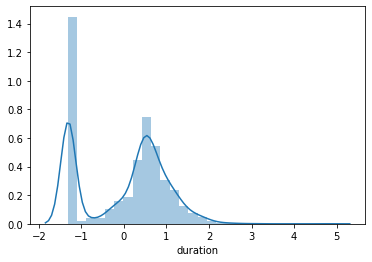

In [28]:
sns.distplot(scaled_features['duration'])

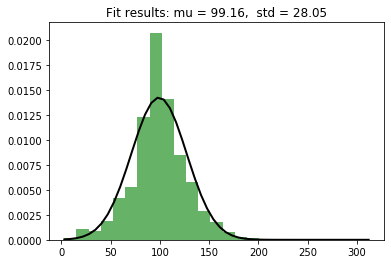

In [29]:
mu, std = norm.fit(durations)

# Plot the histogram.
plt.hist(durations, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
# xmin, xmax = plt.xlim()
x = np.linspace(min(durations), max(durations))
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

## CORRELATION

              release_year  duration
release_year      1.000000 -0.169968
duration         -0.169968  1.000000


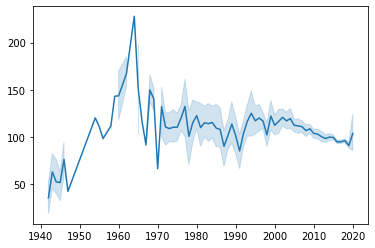

The correlation between the year of release of the movie and the duration of the movie seems to be negetive:
         Hence the durations of the movies seem to be decreasing with the increasing years.
        


In [30]:
#Finding Correlation between release year and duration of Netflix Titles

rel_dur_cor = pd.DataFrame({'release_year' : data_movies['release_year'].tolist(), 'duration':durations})
print(rel_dur_cor.corr())
# sns.pairplot(rel_dur_cor)
sns.lineplot(x = data_movies['release_year'].tolist(), y = durations)
plt.show()

print('''The correlation between the year of release of the movie and the duration of the movie seems to be negetive:
         Hence the durations of the movies seem to be decreasing with the increasing years.
        ''')

## MORE VISUALIZATIONS

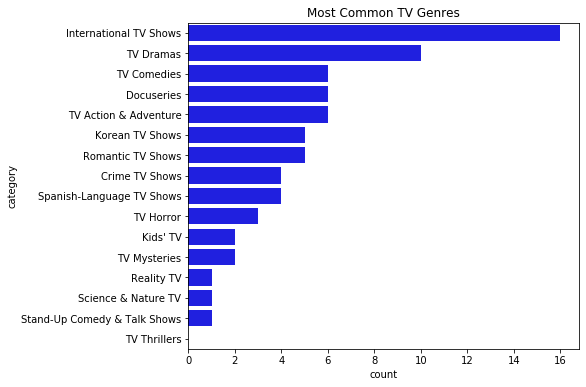

In [31]:
categories = []
for i in range(len(data_tv['show_id'])):
    try:
        categories.append(data_tv['listed_in'][i]);
    except:
        continue;       
cats =list(set(categories))
unique_cats = list(set(', '.join(cats).split(', ')))
ref_cats = ''.join(cats).split(', ')
counts = []
for i in unique_cats:
    counts.append(ref_cats.count(i))

plt.figure(figsize = (7, 6))
dftc = pd.DataFrame({'category' : unique_cats, 'count' : counts})

plt.title('Most Common TV Genres')


sns.barplot(x='count', y="category", data=dftc, order=dftc.sort_values('count', ascending = False).iloc[0:16].category, color = 'blue')
plt.show()

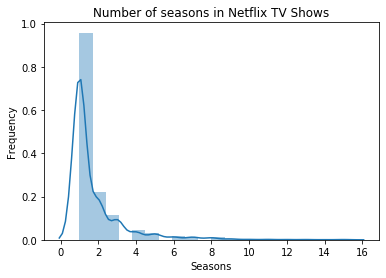

In [32]:
seasons = list(map(lambda x : int(x.split(' ')[0]),data_tv['duration'].tolist()))
plt.title('Number of seasons in Netflix TV Shows')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
sns.distplot(seasons, norm_hist= True, bins = 20)
plt.show()

In [33]:
#key value pair for rating, hypothesis with release_year

In [34]:
data_movies.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","UNITED STATES, INDIA, SOUTH KOREA, CHINA",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,-,Jandino Asporaat,UNITED KINGDOM,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",UNITED STATES,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","BULGARIA, UNITED STATES, SPAIN, CANADA",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,CHILE,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


## HYPOTHESIS TESTING

In [35]:
'''
Hypothesis : All the Movies' durations in different countries are the almost the same

NULL : There is no relation between average movie durations and countries
ALTERNATE: There is a significant relation between average movie durations and countries

Using Chi-Squared Test:

'''

countries_column = unique_country

index = [i for i in range(len(data_movies['show_id']))]
data_movies.index = index

avg_duration_for_country = []

for i in unique_country:
    duration_for_country = []
    for j in range(len(data_movies['show_id'])):
        if(data_movies['country'][j].split(', ') == [' ']):
            continue;
        else:
            if(i in data_movies['country'][j].split(', ')):
                duration_for_country.append(int(data_movies['duration'][j].split()[0]))
    avg_duration_for_country.append(np.mean(duration_for_country))
    

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [36]:
avg_duration_for_country = np.array(avg_duration_for_country)
avg_duration_for_country
# expected = [chi_movies['avg_duration'].sum() / 110 for i in range(110)]
avg_duration_for_country = np.nan_to_num(avg_duration_for_country).tolist()

In [37]:
chi_movies = pd.DataFrame({'country':countries_column, 'avg_duration' : avg_duration_for_country})
chi_movies = chi_movies.sample(10, random_state = 42)

In [38]:
#If the hypothesis came to be true, then the ideal expected values of durations for 
#all the movies will be the average duration itself.

chi_movies['expected'] = [sum(chi_movies['avg_duration']) / 10 for i in range(10)]

In [39]:
chi = [(i - chi_movies['expected'][4])**2 /chi_movies['expected'][4] for i in chi_movies['avg_duration']]

In [40]:
print('Chi Squared Value =', sum(chi))
print('Degrees of freedon =', 9*2)


#Considering the significance value, (alpha) to be 0.05 and the degree of freedom to be 18, we get the tabular 
#chi-sqaured value as 28.87

if(sum(chi) > 28.87):
    print("NULL HYPOTHESIS REJECTED: There is a significant relation between average movie durations and countries ")
else:
    print("NULL HYPOTHESIS ACCEPTED: There is no relation between average movie durations and countries")
    



Chi Squared Value = 20.83221924064206
Degrees of freedon = 18
NULL HYPOTHESIS ACCEPTED: There is no relation between average movie durations and countries
